<a href="https://colab.research.google.com/github/melihkurtaran/Bank_Marketing/blob/main/TOM_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
#Import libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

from sklearn.inspection import permutation_importance
from sklearn.tree import plot_tree
import json, pickle

In [2]:
#Connect to GitHub for faster access
!git clone https://github.com/melihkurtaran/Bank_Marketing.git

Cloning into 'Bank_Marketing'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 19 (delta 7), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (19/19), 1.19 MiB | 7.07 MiB/s, done.
Resolving deltas: 100% (7/7), done.


Show the explanation

In [3]:
file_path = 'Bank_Marketing/bank-additional-names.txt'

# Open the file in read mode
with open(file_path, 'r') as file:
    # Read the contents of the file
    file_contents = file.read()

    # Print the contents
    print(file_contents)


﻿Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This

In [4]:
file_path = 'Bank_Marketing/bank-additional-full.csv'
df = pd.read_csv(file_path, delimiter=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
# Count the number of examples in each class
class_counts = df['y'].value_counts()

# Calculate the imbalance ratio
imbalance_ratio = class_counts[1] / class_counts[0]

# Calculate the imbalance percentage
imbalance_percentage = (class_counts[1] / df.shape[0]) * 100

print("Class Counts:")
print(class_counts)
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")
print(f"Imbalance Percentage: {imbalance_percentage:.2f}%")

Class Counts:
no     36548
yes     4640
Name: y, dtype: int64
Imbalance Ratio: 0.13
Imbalance Percentage: 11.27%



These counts show the number of instances belonging to each class in the binary classification problem. In this case, "no" represents clients who did not subscribe to a bank term deposit, and "yes" represents clients who did subscribe.

**Imbalance Ratio: 0.13**

The imbalance ratio is calculated as the ratio of the number of instances in the minority class ("yes") to the number of instances in the majority class ("no").
In this dataset, the imbalance ratio is approximately 0.13, indicating that the minority class ("yes") is about 0.13 times smaller than the majority class ("no").

**Imbalance Percentage: 11.27%**

The imbalance percentage is calculated as the proportion of instances in the minority class ("yes") relative to the total number of instances in the dataset.
In this dataset, the imbalance percentage is approximately 11.27%, which means that the "yes" class accounts for approximately 11.27% of all instances in the dataset, while the "no" class represents the remaining 88.73%.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Missing values

In [7]:
categorical_columns_with_unknown = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

# Count "unknown" values in each categorical column
unknown_counts = {}
for column in categorical_columns_with_unknown:
    unknown_counts[column] = (df[column] == "unknown").sum()

# Display the counts of "unknown" values
print("Unknown Value Counts:")
for column, count in unknown_counts.items():
    print(f"{column}: {count}")

Unknown Value Counts:
job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990
contact: 0
month: 0
day_of_week: 0
poutcome: 0


# **EDA**

Distribution of Target Variable

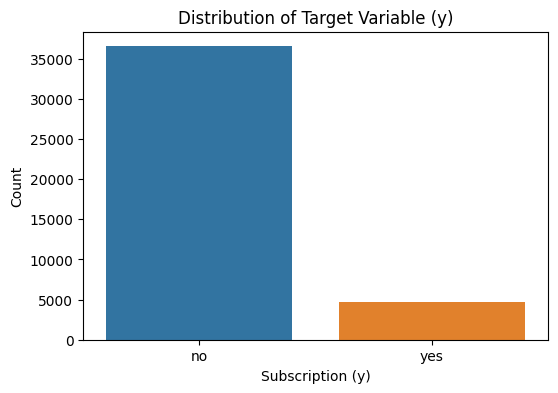

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='y')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscription (y)')
plt.ylabel('Count')
plt.show()


Age Distribution

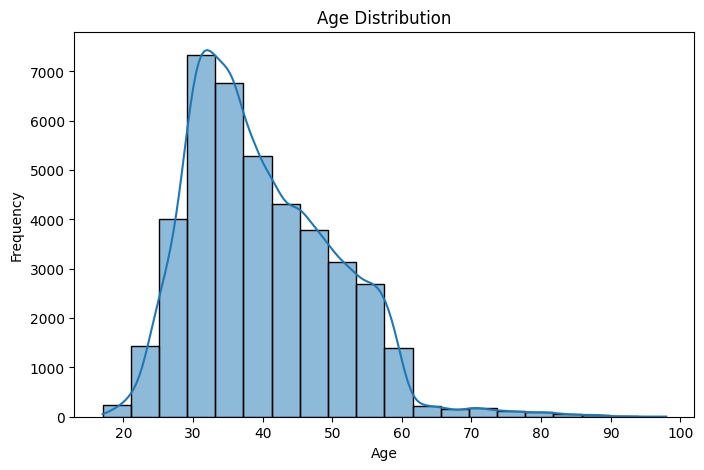

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Job Categories

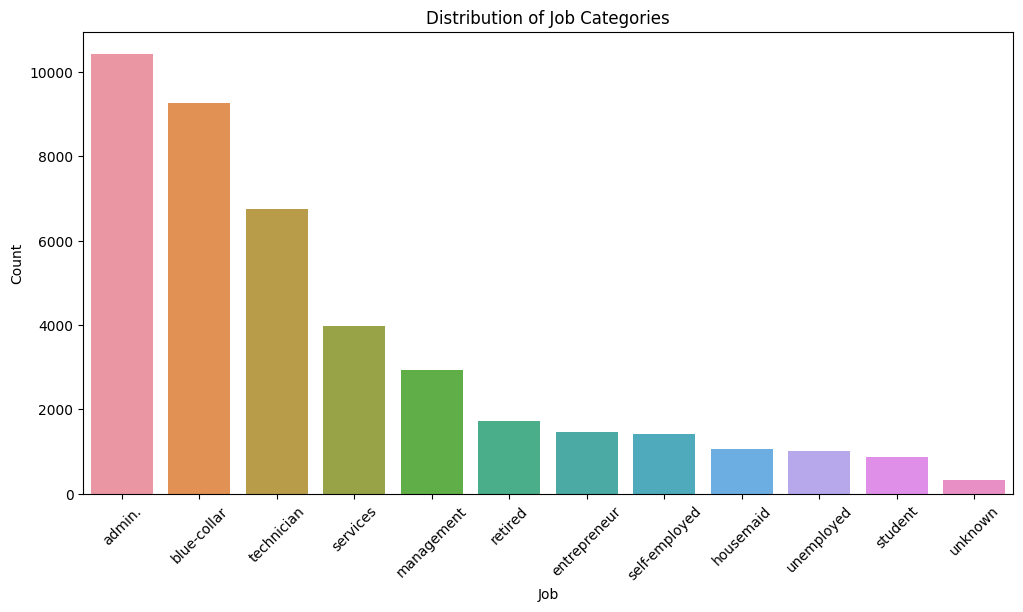

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.title('Distribution of Job Categories')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Distribution of Ages by Occupation

In [11]:
import plotly.express as px

# Filter the DataFrame for subscribers
subscribed_df = df[df["y"] == "yes"]

# Create a box plot
fig = px.box(subscribed_df, x="job", y="age", color="job")

# Customize the layout
fig.update_layout(
    title="Distribution of Ages by Occupation",
    xaxis_title="Occupation",
    yaxis_title="Age",
    showlegend=False
)

# Show the plot
fig.show()


Marital Status Distribution

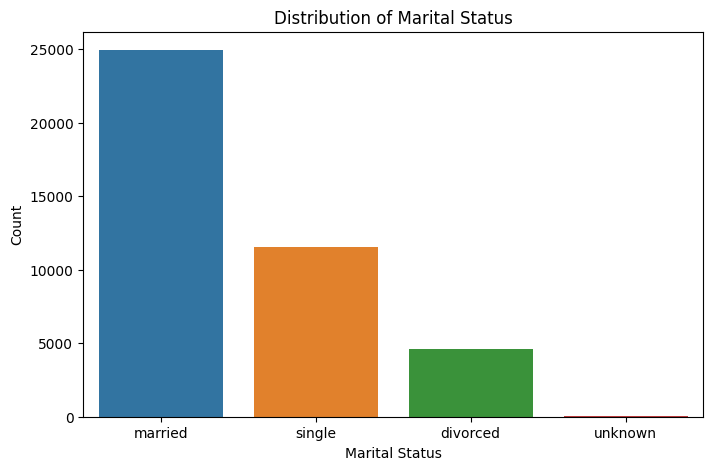

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='marital', order=df['marital'].value_counts().index)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

Education Levels

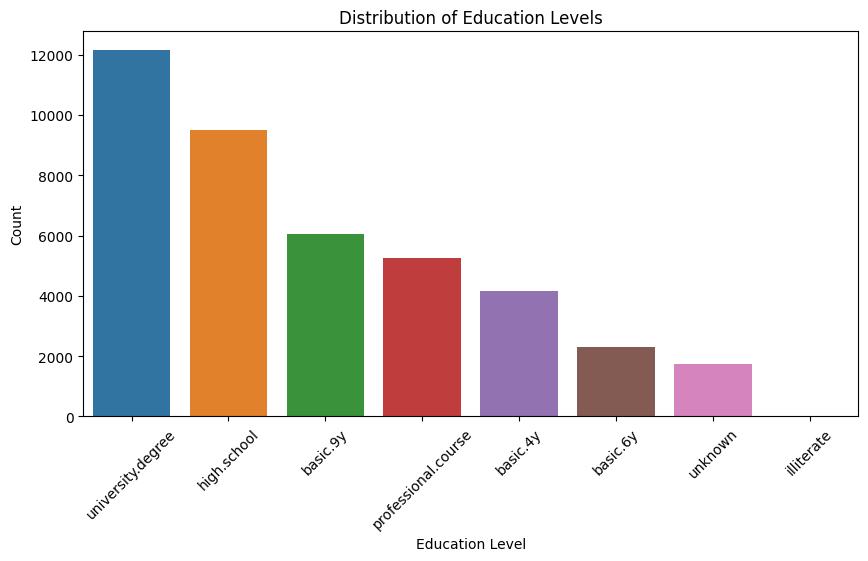

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Stacked bar charts to visualize the distribution of clients with credit in default, housing loans, and personal loans.

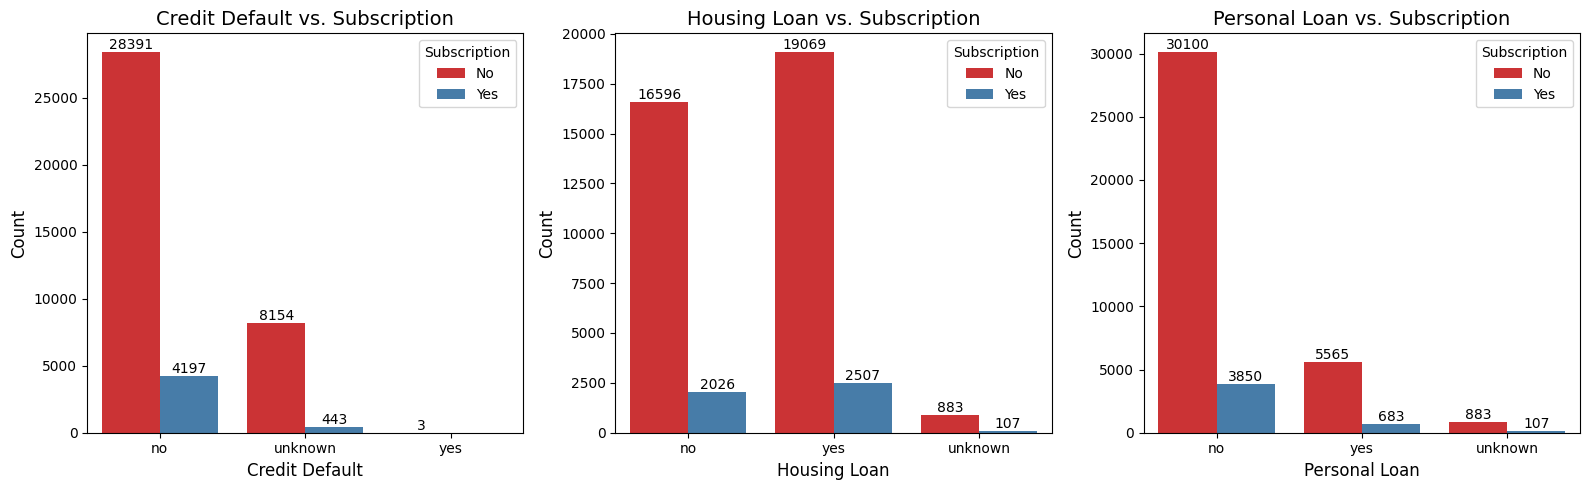

In [14]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: Credit Default vs. Subscription
sns.countplot(data=df, x='default', hue='y', ax=axes[0], palette='Set1')
axes[0].set_title('Credit Default vs. Subscription', fontsize=14)
axes[0].set_xlabel('Credit Default', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(title='Subscription', labels=['No', 'Yes'])

# Annotate counts for Plot 1
for p in axes[0].patches:
    height = p.get_height()
    if not height:
        continue
    x = p.get_x() + p.get_width() / 2.
    axes[0].annotate(f'{int(height)}', (x, height), ha='center', va='bottom', fontsize=10)

# Plot 2: Housing Loan vs. Subscription
sns.countplot(data=df, x='housing', hue='y', ax=axes[1], palette='Set1')
axes[1].set_title('Housing Loan vs. Subscription', fontsize=14)
axes[1].set_xlabel('Housing Loan', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].legend(title='Subscription', labels=['No', 'Yes'])

# Annotate counts for Plot 2
for p in axes[1].patches:
    height = p.get_height()
    if not height:
        continue
    x = p.get_x() + p.get_width() / 2.
    axes[1].annotate(f'{int(height)}', (x, height), ha='center', va='bottom', fontsize=10)

# Plot 3: Personal Loan vs. Subscription
sns.countplot(data=df, x='loan', hue='y', ax=axes[2], palette='Set1')
axes[2].set_title('Personal Loan vs. Subscription', fontsize=14)
axes[2].set_xlabel('Personal Loan', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)
axes[2].legend(title='Subscription', labels=['No', 'Yes'])

# Annotate counts for Plot 3
for p in axes[2].patches:
    height = p.get_height()
    if not height:
        continue
    x = p.get_x() + p.get_width() / 2.
    axes[2].annotate(f'{int(height)}', (x, height), ha='center', va='bottom', fontsize=10)

# Adjust spacing
plt.tight_layout()

# Show the subplots
plt.show()


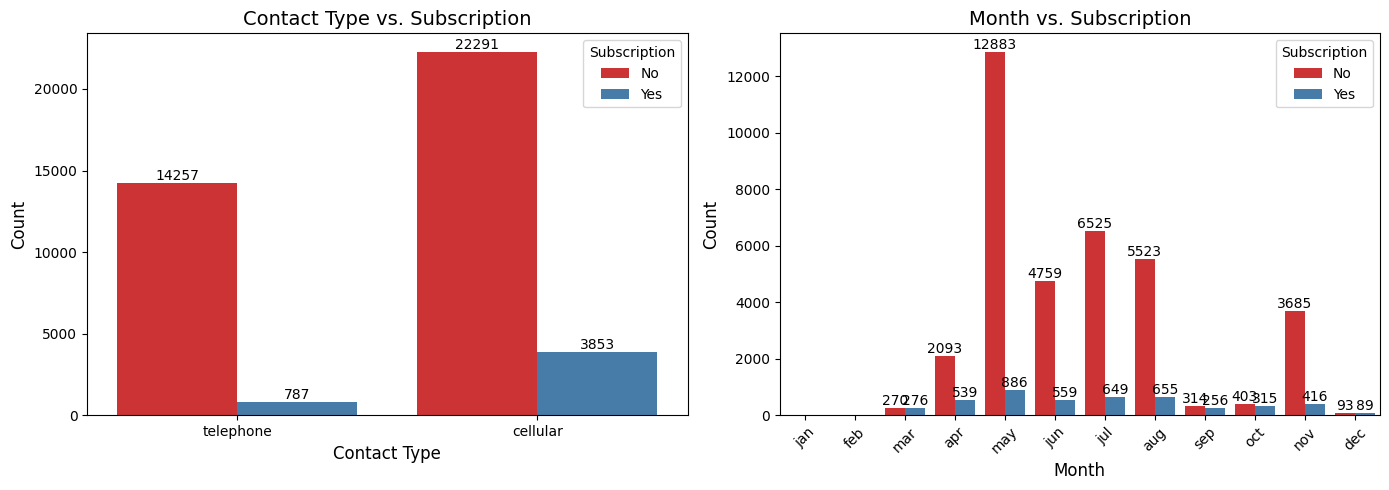

In [15]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Contact Type vs. Subscription
sns.countplot(data=df, x='contact', hue='y', ax=axes[0], palette='Set1')
axes[0].set_title('Contact Type vs. Subscription', fontsize=14)
axes[0].set_xlabel('Contact Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(title='Subscription', labels=['No', 'Yes'])

# Annotate counts for Plot 1
for p in axes[0].patches:
    height = p.get_height()
    if not height:
        continue
    x = p.get_x() + p.get_width() / 2.
    if not pd.isna(height):
        axes[0].annotate(f'{int(height)}', (x, height), ha='center', va='bottom', fontsize=10)

# Plot 2: Month vs. Subscription
sns.countplot(data=df, x='month', hue='y',
              order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
              ax=axes[1], palette='Set1')
axes[1].set_title('Month vs. Subscription', fontsize=14)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Subscription', labels=['No', 'Yes'])

# Annotate counts for Plot 2 (skip NaN values)
for p in axes[1].patches:
    height = p.get_height()
    if not height:
        continue
    x = p.get_x() + p.get_width() / 2.
    if not pd.isna(height):
        axes[1].annotate(f'{int(height)}', (x, height), ha='center', va='bottom', fontsize=10)

# Adjust spacing
plt.tight_layout()

# Show the subplots
plt.show()


Let's see the effect of previous campaign outcome to our target value subscription to our new campaign

<Figure size 1000x600 with 0 Axes>

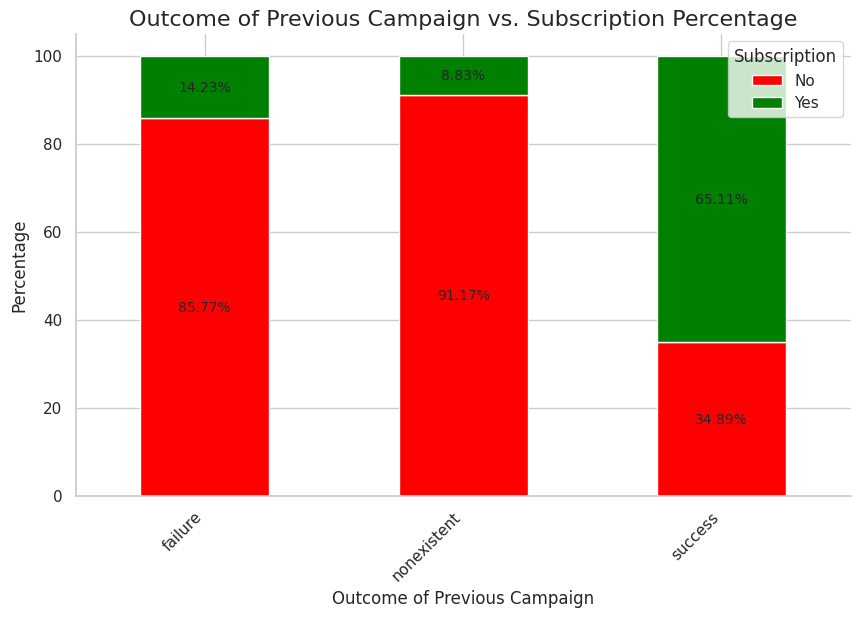

In [16]:
# Calculate percentages for each category of "poutcome"
percentage_df = df.groupby('poutcome')['y'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Create a bar chart with percentages
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')  # Set a whitegrid background style
ax = percentage_df.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))
plt.title('Outcome of Previous Campaign vs. Subscription Percentage', fontsize=16)
plt.xlabel('Outcome of Previous Campaign', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Subscription', labels=['No', 'Yes'])  # Add a legend with clear labels
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
sns.despine()  # Remove the top and right spines

# Annotate the percentages on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    if height > 0:
        ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

plt.show()


The outcome of the previous campaign ("poutcome") is a significant factor in predicting whether a client will subscribe to a term deposit. Clients with a previous campaign outcome of "Failure" or "Nonexistent" are less likely to subscribe, while those with a previous campaign outcome of "Success" are more likely to subscribe.

Campaign Success Rate Comparison

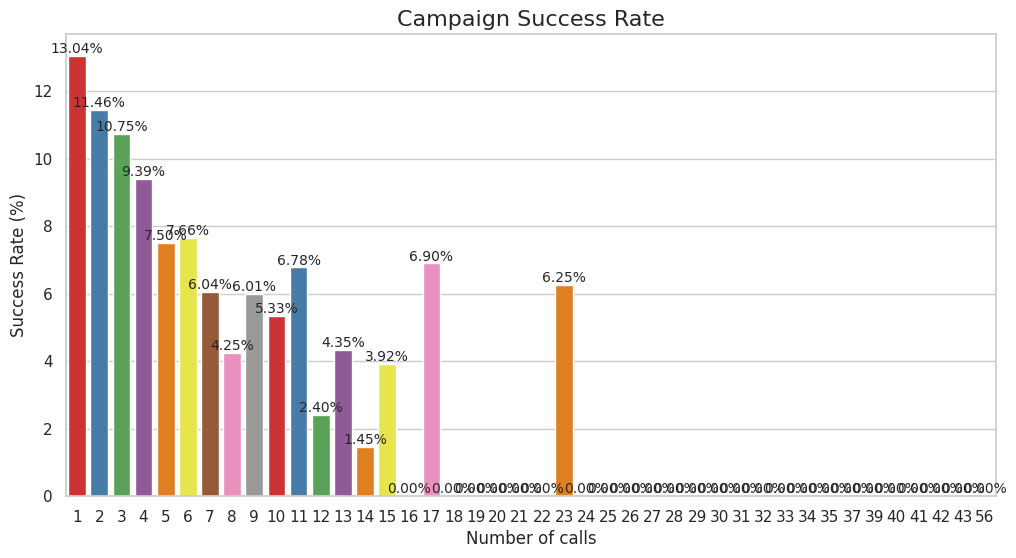

In [17]:
# Calculate the success rate for each campaign
campaign_success_rate = df.groupby('campaign')['y'].value_counts(normalize=True).unstack(fill_value=0)['yes'] * 100

# Create a bar plot to visualize the success rates
plt.figure(figsize=(12, 6))
sns.barplot(x=campaign_success_rate.index, y=campaign_success_rate.values, palette='Set1')
plt.title('Campaign Success Rate', fontsize=16)
plt.xlabel('Number of calls', fontsize=12)
plt.ylabel('Success Rate (%)', fontsize=12)
plt.xticks(rotation=0)

# Annotate the bars with percentage values
for i, v in enumerate(campaign_success_rate.values):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()


We see that for successful campaigns we have longer call duration

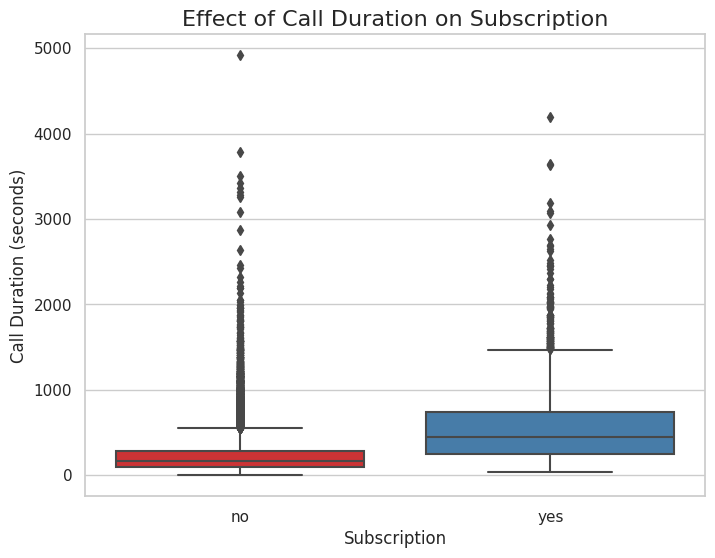

In [18]:
# Create a box plot to visualize the effect of 'duration' on the target variable
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='y', y='duration', palette='Set1')
plt.title('Effect of Call Duration on Subscription', fontsize=16)
plt.xlabel('Subscription', fontsize=12)
plt.ylabel('Call Duration (seconds)', fontsize=12)

# Show the plot
plt.show()


## Feature Importance & Analysis

In [19]:
def plot_feature_importance(X_encoded, y, n_estimators=100, random_state=42, top_n=10):
    """
    Plot the feature importance using a Random Forest classifier.

    Parameters:
    - X: Features DataFrame
    - y: Target variable Series
    - n_estimators: Number of estimators for the Random Forest (default is 100)
    - random_state: Random state for reproducibility (default is 42)
    - top_n: Number of top features to display (default is 10)
    """

    # Initialize the Random Forest classifier
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)

    # Fit the model
    clf.fit(X_encoded, y)

    # Get feature importances
    feature_importances = clf.feature_importances_

    # Create a DataFrame to store feature names and their importances
    feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

    # Sort features by importance in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Select the top N most important features
    top_features = feature_importance_df.head(top_n)

    # Plot feature importance for the top N features
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
    plt.title(f'Top {top_n} Most Important Features', fontsize=16)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.grid(True)
    plt.show()


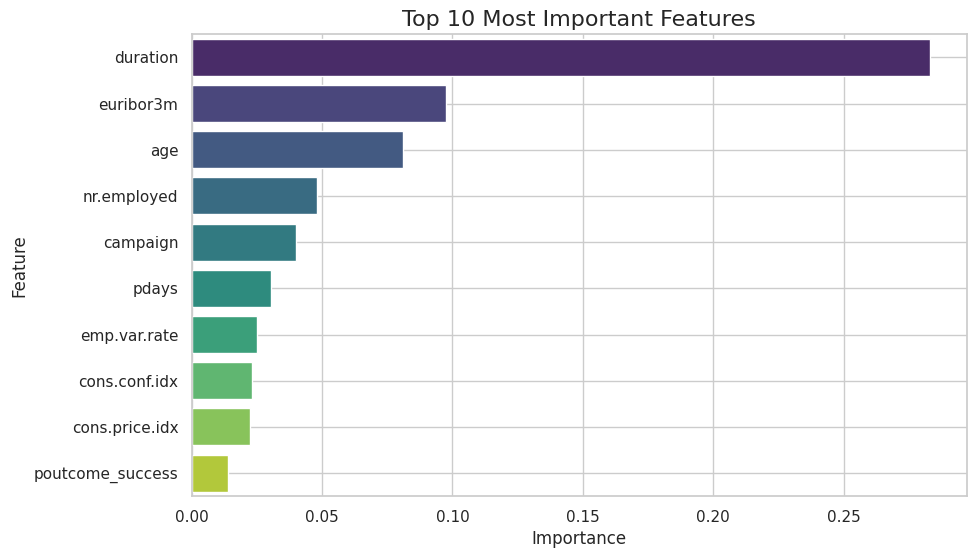

In [20]:
X = df.drop(columns=['y'])  # Features
y = df['y']  # Target variable

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=['job', 'marital', 'education', 'default', 'housing',
                                       'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

plot_feature_importance(X_encoded, y, n_estimators=100, random_state=42, top_n=10)

It is seen that the most important feature seems the last contact duration (the reason for that if the duration is 0 it is known that y is No). Also, after the end of call y is obviously known. Thus, this input should be discarded for a realistic prediction. The feature Contact will also be discarded for a realistic predictive model.

Second most important feature is euribor3m, it is a daily indicator and it affects client decision so it should be included in the model.

The number of contacts performed during this campaign is the 5th most important feature and it cannot also be used for a realistic prediction.

Month and day of week will also be discarded since they are based on the last contact time.

Now we discard them and check the most important features again.

In [91]:
df

,age,job,marital,education,default,housing,loan,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,contacted_before
0,56,housemaid,married,basic.4y,no,no,no,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,51+,0
1,57,services,married,high.school,unknown,no,no,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,51+,0
2,37,services,married,high.school,no,yes,no,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,33-40,0
3,40,admin.,married,basic.6y,no,no,no,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,41-50,0
4,56,services,married,high.school,no,no,yes,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,51+,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,51+,0
41184,46,blue-collar,married,professional.course,no,no,no,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,41-50,0
41185,56,retired,married,university.degree,no,yes,no,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,51+,0
41186,44,technician,married,professional.course,no,no,no,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,41-50,0


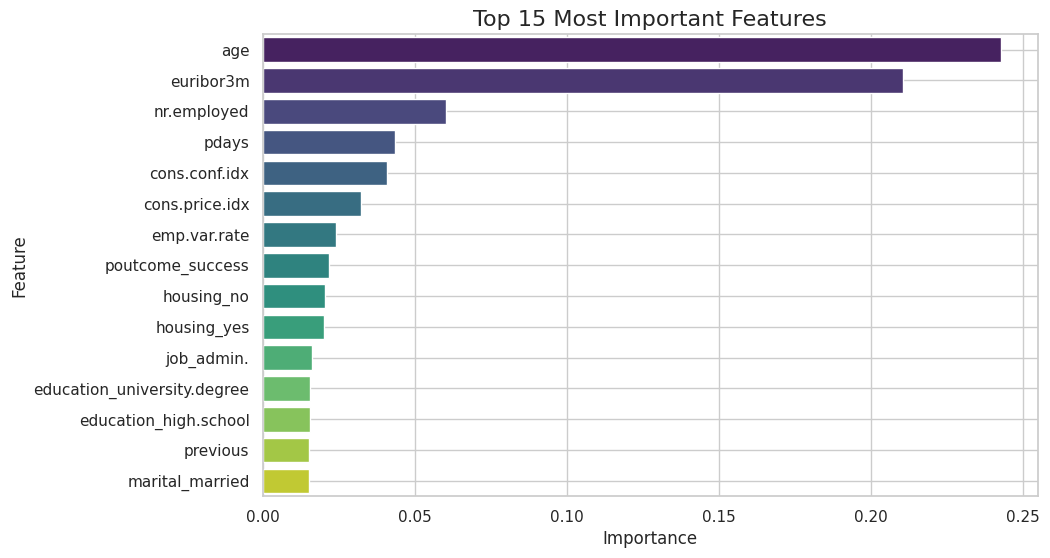

In [21]:
df = df.drop(columns=['duration', 'contact', 'campaign', 'month', 'day_of_week'])

X = df.drop(columns=['y'])  # Features
y = df['y']  # Target variable

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=['job', 'marital', 'education', 'default', 'housing',
                                       'loan', 'poutcome'])

plot_feature_importance(X_encoded, y, n_estimators=100, random_state=42, top_n=15)

## Feature Engineering

Age Binning

In [22]:
min_age = df['age'].min()
print(f"The minimum age is: {min_age} years")

The minimum age is: 17 years


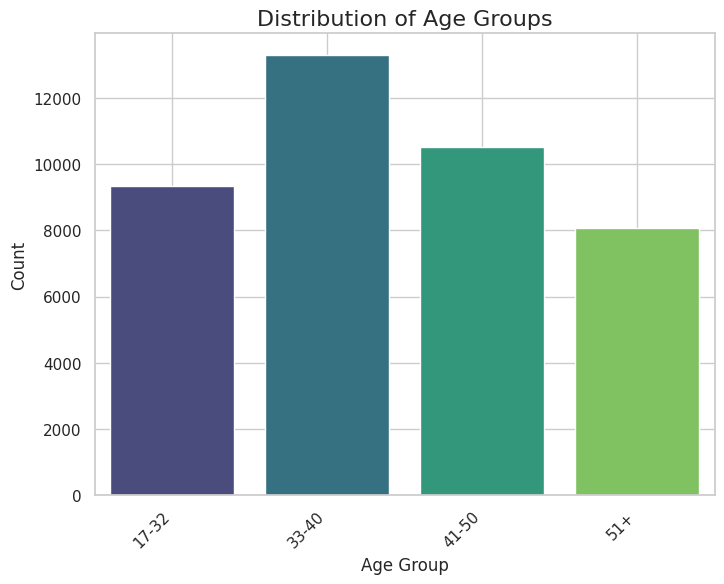

In [23]:
# Define the age bins and labels
age_bins = [17, 32, 40, 50, float('inf')]
age_labels = ['17-32', '33-40', '41-50', '51+']

# Create a new column 'age_group' with age bins
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)


# Plot the distribution of age groups
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='age_group', palette='viridis')
plt.title('Distribution of Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

In [24]:
import pandas as pd

# Create a new column 'pdays_category' with 1 for 'Contacted' and 0 for 'Not Contacted'
df['contacted_before'] = df['pdays'].apply(lambda x: 1 if x != 999 else 0)

# Drop the original 'pdays' column
df.drop('pdays', axis=1, inplace=True)

# Display the first few rows to check the result
print(df['contacted_before'].value_counts())

0    39673
1     1515
Name: contacted_before, dtype: int64


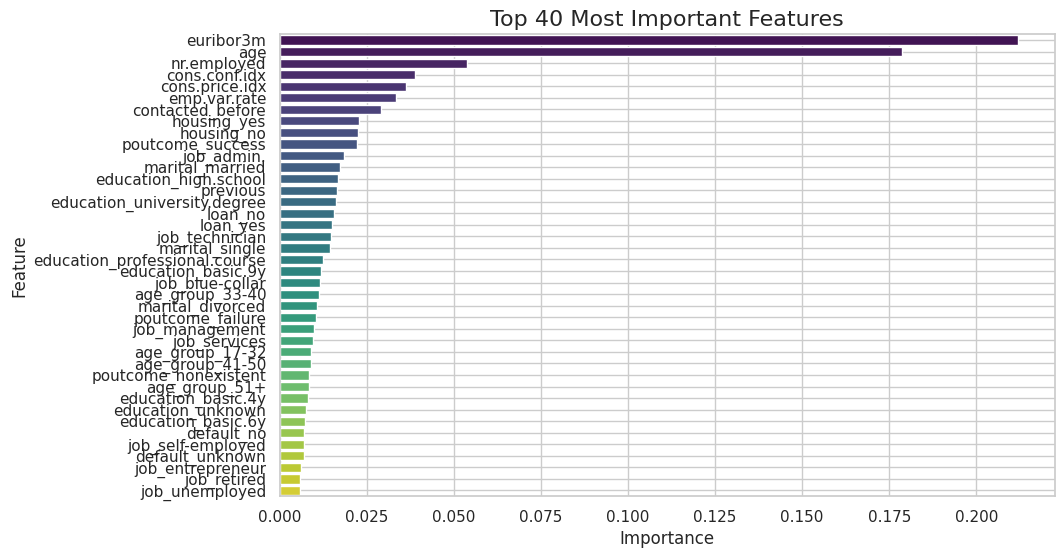

In [52]:
X = df.drop(columns=['y'])  # Features
y = df['y']  # Target variable

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=['age_group','job', 'marital', 'education', 'default', 'housing',
                                       'loan', 'poutcome'])

plot_feature_importance(X_encoded, y, n_estimators=100, random_state=42, top_n=20)

# Modeling

Logistic Regression with SMOTE Oversampling

In [54]:
# Encode the target variable 'y' as binary labels ('yes' as 1, 'no' as 0)
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

# Separate features (X) and target (y)
X = df.drop(columns=['y'])  # Features
y = df['y']  # Target

# One-hot encode categorical features
categorical_features = ['age_group','job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

In [55]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_encoded, y)

# Split the data into training and testing sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=42)

# Fit the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict probabilities of the positive class (class 1)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
threshold = 0.5

# Use the custom threshold to make binary predictions
y_pred_custom = (y_pred_prob >= threshold).astype(int)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))

Accuracy: 0.784167084682384

Confusion Matrix:
 [[8817 2188]
 [2545 8379]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79     11005
           1       0.79      0.77      0.78     10924

    accuracy                           0.78     21929
   macro avg       0.78      0.78      0.78     21929
weighted avg       0.78      0.78      0.78     21929



Logistic Regression did not perform well, I try my fav model XGBoost

In [56]:
# Create an XGBoost classifier and fit it to the training data
xgb_classifier = xgb.XGBClassifier(random_state=42, learning_rate= 0.2, n_estimators= 300)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.893246386064116

Confusion Matrix:
 [[10107   898]
 [ 1443  9481]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     11005
           1       0.91      0.87      0.89     10924

    accuracy                           0.89     21929
   macro avg       0.89      0.89      0.89     21929
weighted avg       0.89      0.89      0.89     21929



## Model Selection

In [57]:
# Create a StandardScaler object
scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize dictionaries to store accuracy and F1-score results
accuracy_results = {}
f1_score_results = {}

# List of classifiers to compare
models = [
    ("KNN Classifier", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("RandomForest", RandomForestClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("XGBoost", XGBClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("Neural Network", MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)),
]

# Rest of the code remains the same
# Loop through the list of models, fit each model, and evaluate its performance
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate accuracy and F1-score
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)

    # Store results in dictionaries
    accuracy_results[name] = (accuracy_train, accuracy_test)
    f1_score_results[name] = (f1_train, f1_test)

    print(f"For {name}::")
    print(f"Training Accuracy: {accuracy_train}")
    print(f"Testing Accuracy: {accuracy_test}")
    print(f"Training F1-Score: {f1_train}")
    print(f"Testing F1-Score: {f1_test}")
    print("------" * 10)

For KNN Classifier::
Training Accuracy: 0.9009713291770086
Testing Accuracy: 0.8553513612111815
Training F1-Score: 0.9027017685350539
Testing F1-Score: 0.8580887616320688
------------------------------------------------------------
For Decision Tree::
Training Accuracy: 0.990071725917095
Testing Accuracy: 0.8836700259929773
Training F1-Score: 0.9900501410216234
Testing F1-Score: 0.8843451058620847
------------------------------------------------------------
For RandomForest::
Training Accuracy: 0.990071725917095
Testing Accuracy: 0.9036891787131196
Training F1-Score: 0.9900858704137393
Testing F1-Score: 0.9037111334002007
------------------------------------------------------------
For AdaBoost::
Training Accuracy: 0.8197666464713584
Testing Accuracy: 0.8164074969218843
Training F1-Score: 0.8150421179302045
Testing F1-Score: 0.8103090840557858
------------------------------------------------------------
For XGBoost::
Training Accuracy: 0.9026911876795591
Testing Accuracy: 0.88704455287

In [58]:
# Display the results in a tabular format
results_df = pd.DataFrame({'Accuracy (Train)': [result[0] for result in accuracy_results.values()],
                           'Accuracy (Test)': [result[1] for result in accuracy_results.values()],
                           'F1-Score (Train)': [result[0] for result in f1_score_results.values()],
                           'F1-Score (Test)': [result[1] for result in f1_score_results.values()]},
                          index=accuracy_results.keys())

print("\nComparison of Accuracy and F1-Score:")
results_df


Comparison of Accuracy and F1-Score:


,Accuracy (Train),Accuracy (Test),F1-Score (Train),F1-Score (Test)
KNN Classifier,0.900971,0.855351,0.902702,0.858089
Decision Tree,0.990072,0.883670,0.990050,0.884345
RandomForest,0.990072,0.903689,0.990086,0.903711
AdaBoost,0.819767,0.816407,0.815042,0.810309
XGBoost,0.902691,0.887045,0.900338,0.883605
Gradient Boosting,0.825962,0.820238,0.815582,0.808268
Neural Network,0.910333,0.854941,0.909887,0.854276


Highest test accuracy and F1-score belong to Random Forest so we will proceed with that

## Hyperparameter tuning

In [37]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for random search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist,
                                   scoring='accuracy', cv=3, n_jobs=-1, n_iter=10, random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the random search
best_params_random = random_search.best_params_

# Get the best estimator (Random Forest model with best hyperparameters)
best_rf_model_random = random_search.best_estimator_

# Make predictions using the best model on the test data
y_pred_random = best_rf_model_random.predict(X_test)

# Calculate the F1-score and accuracy
f1_score_test_random = f1_score(y_test, y_pred_random)
accuracy_test_random = accuracy_score(y_test, y_pred_random)

# Print the results
print("Best Hyperparameters (RandomizedSearchCV):", best_params_random)
print("Testing F1-Score (RandomizedSearchCV):", f1_score_test_random)
print("Testing Accuracy (RandomizedSearchCV):", accuracy_test_random)


Best Hyperparameters (RandomizedSearchCV): {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Testing F1-Score (RandomizedSearchCV): 0.9057119431538673
Testing Accuracy (RandomizedSearchCV): 0.9056044507273473


# Explainable AI

Feature Importance:

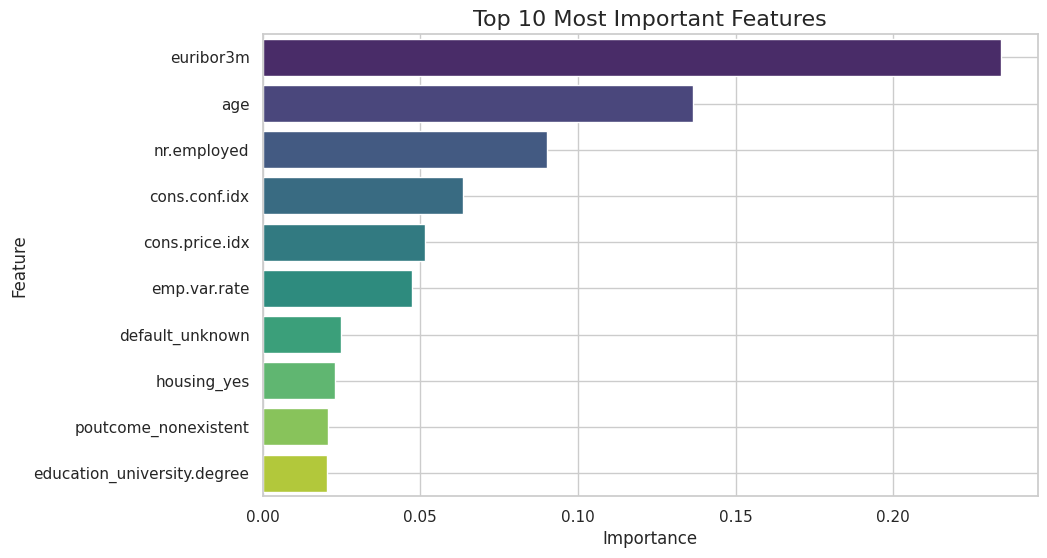

In [59]:
model = RandomForestClassifier(n_estimators=300, min_samples_split=2,min_samples_leaf=1, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance for the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Most Important Features', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(True)
plt.show()

Permutation Importance:

It measures how the model's performance decreases when the values of a specific feature are randomly shuffled. Higher drops in performance indicate more important features.

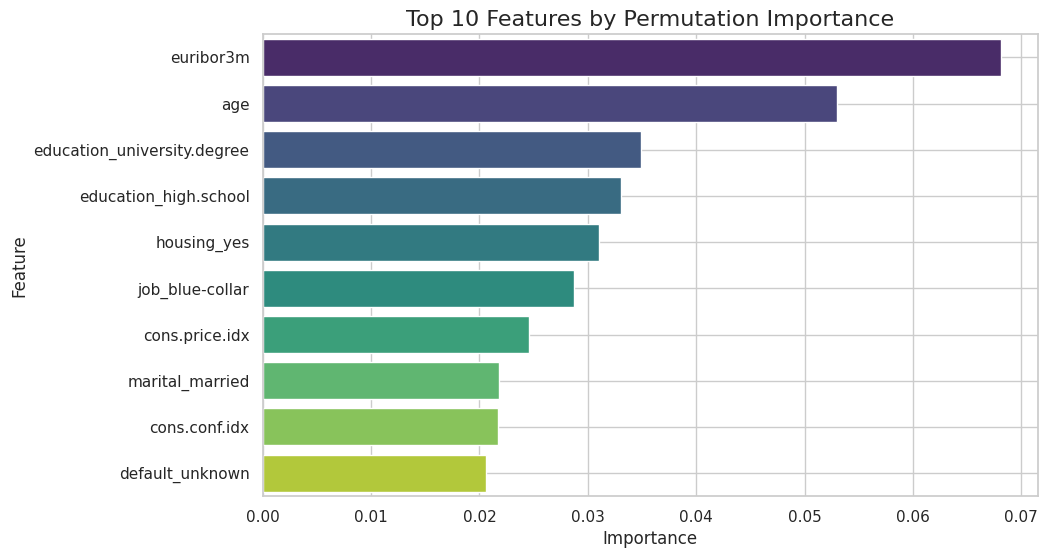

In [65]:
# Calculate permutation importances
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=3, random_state=42)

# Create a DataFrame to store feature names and their importances
perm_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': perm_importance.importances_mean})

# Sort features by importance in descending order
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Plot permutation importance for the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=perm_importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Features by Permutation Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(True)
plt.show()


In [72]:
# Calculate the correlation matrix between features and the target variable 'y'
correlation_matrix = df.corr()
correlation_with_y = correlation_matrix['y'].sort_values(ascending=False)

# Display the correlation values
print(correlation_with_y)

y                   1.000000
contacted_before    0.324877
previous            0.230181
cons.conf.idx       0.054878
age                 0.030399
cons.price.idx     -0.136211
emp.var.rate       -0.298334
euribor3m          -0.307771
nr.employed        -0.354678
Name: y, dtype: float64


Contacted Before: The 'contacted_before' feature exhibits a positive correlation of approximately 0.325 with the target variable 'y'. This correlation suggests that clients who have been contacted before, possibly in previous marketing campaigns, tend to display a higher propensity to subscribe to a term deposit in the current campaign. This finding underscores the importance of prior interactions with clients in influencing their decision to subscribe, reflecting the notion of building a relationship over time.

Consumer Confidence Index (cons.conf.idx): The 'cons.conf.idx' feature displays a positive correlation of about 0.055 with the target variable 'y'. This positive association suggests that a higher consumer confidence index is linked to a greater likelihood of clients subscribing to a term deposit. An optimistic consumer sentiment may lead to more favorable financial decisions, such as term deposit subscriptions.

Employment Variation Rate (emp.var.rate): The 'emp.var.rate' feature exhibits a notable negative correlation of approximately -0.298 with 'y'. This suggests that a higher employment variation rate is associated with a lower likelihood of clients subscribing to a term deposit. Economic stability, reflected in lower employment variation rates, may lead to greater confidence in making long-term financial commitments.

Euribor 3 Month Rate (euribor3m): The 'euribor3m' feature displays a substantial negative correlation of around -0.308 with 'y'. Clients are less likely to subscribe to a term deposit when the euribor 3-month rate is higher. This emphasizes the sensitivity of clients to prevailing interest rates and their influence on financial decisions.

Number of Employees (nr.employed): The 'nr.employed' feature showcases a substantial negative correlation of approximately -0.355 with 'y'. A higher number of employees is associated with a lower likelihood of clients subscribing to a term deposit. This suggests that a larger workforce may indicate economic conditions less conducive to term deposit subscriptions.

To interpret individual trees within the Random Forest:

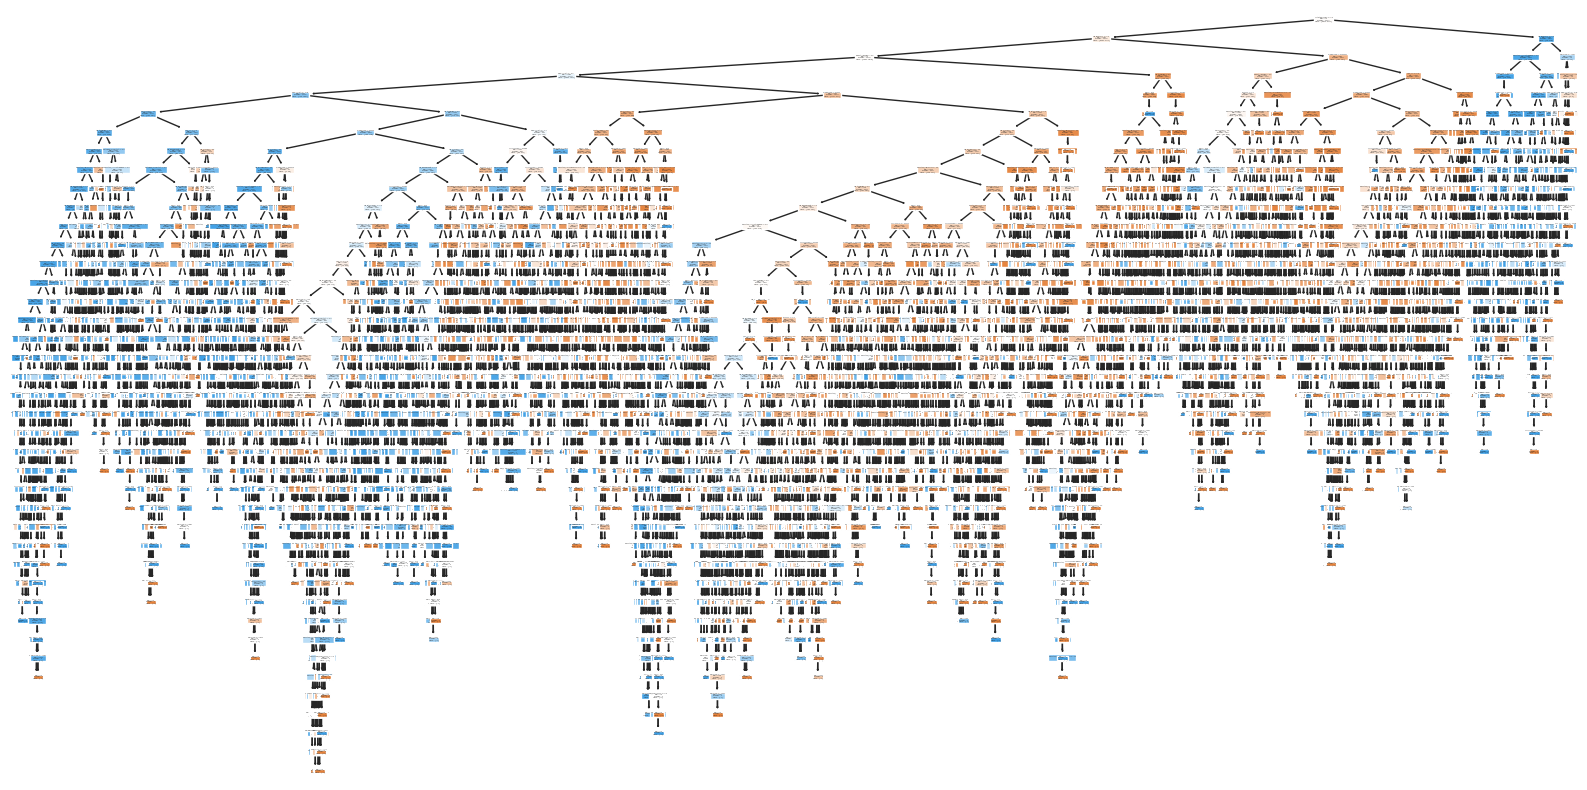

In [64]:
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=X_train.columns, filled=True)
plt.show()

Since we have 40 features the trees in the random forest are quite complex

# Model Deployment

In [79]:
model

RandomForestClassifier(n_estimators=300, random_state=42)

In [81]:
with open("random_forest.pkl", "wb") as f:
    pickle.dump(model, f)

In [151]:
model_file_path = "random_forest.pkl"
# Load the model from the file
with open(model_file_path, "rb") as f:
    loaded_model = pickle.load(f)
loaded_model

RandomForestClassifier(n_estimators=300, random_state=42)

## API

In [84]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load your pre-trained model
model = joblib.load('random_forest.pkl')

In [89]:
from flask import Flask, request, redirect
from flask_restful import Resource, Api
from flask_cors import CORS
import os
import prediction

app = Flask(__name__)
cors = CORS(app, resources={r"*": {"origins": "*"}})
api = Api(app)

class Test(Resource):
    def get(self):
        return 'Welcome to, Test App API!'

    def post(self):
        try:
            value = request.get_json()
            if(value):
                return {'Post Values': value}, 201

            return {"error":"Invalid format."}

        except Exception as error:
            return {'error': error}

class GetPredictionOutput(Resource):
    def get(self):
        return {"error":"Invalid Method."}

    def post(self):
        try:
            data = request.get_json()
            predict = prediction.predict_mpg(data)
            predictOutput = predict
            return {'predict':predictOutput}

        except Exception as error:
            return {'error': error}

api.add_resource(Test,'/')
api.add_resource(GetPredictionOutput,'/getPredictionOutput')

if __name__ == "__main__":
    port = int(os.environ.get("PORT", 5000))
    app.run(host='0.0.0.0', port=port)

ModuleNotFoundError: No module named 'flask_restful'

In [86]:
import requests
import json

# Define the API endpoint URL
api_url = 'http://localhost:5000/predict'  # Replace with the correct URL of your Flask API

# Prepare your input data as a dictionary (JSON format)
data = {
    'age': 30,
    'job': 'admin.',
    'marital': 'single',
    'education': 'university.degree',
    'default': 'no',
    'housing': 'yes',
    'loan': 'no',
    'previous': 0,
    'poutcome': 'nonexistent',
    'emp.var.rate': 1.1,
    'cons.price.idx': 93.994,
    'cons.conf.idx': -36.4,
    'euribor3m': 4.857,
    'nr.employed': 5191.0,
}

# Send a POST request with the input data to the API
response = requests.post(api_url, json=data)

# Check the response from the API
if response.status_code == 200:
    result = response.json()
    predictions = result['predictions']
    print(f'Predicted class: {predictions}')
else:
    print(f'Error: {response.status_code}')


ConnectionError: HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7830d8ac82e0>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [94]:
X_encoded.iloc[235]

age                                44.000
previous                            0.000
emp.var.rate                        1.100
cons.price.idx                     93.994
cons.conf.idx                     -36.400
euribor3m                           4.857
nr.employed                      5191.000
contacted_before                    0.000
age_group_33-40                     0.000
age_group_41-50                     1.000
age_group_51+                       0.000
job_blue-collar                     0.000
job_entrepreneur                    0.000
job_housemaid                       0.000
job_management                      0.000
job_retired                         0.000
job_self-employed                   0.000
job_services                        0.000
job_student                         0.000
job_technician                      0.000
job_unemployed                      0.000
job_unknown                         0.000
marital_married                     1.000
marital_single                    

In [143]:
import json

sample_dict = X_encoded.iloc[435].to_dict()
sample_json = json.dumps(sample_dict, indent=4)

print(sample_json)

{
    "age": 37.0,
    "previous": 0.0,
    "emp.var.rate": 1.1,
    "cons.price.idx": 93.994,
    "cons.conf.idx": -36.4,
    "euribor3m": 4.857,
    "nr.employed": 5191.0,
    "contacted_before": 0.0,
    "age_group_33-40": 1.0,
    "age_group_41-50": 0.0,
    "age_group_51+": 0.0,
    "job_blue-collar": 0.0,
    "job_entrepreneur": 0.0,
    "job_housemaid": 0.0,
    "job_management": 0.0,
    "job_retired": 0.0,
    "job_self-employed": 0.0,
    "job_services": 0.0,
    "job_student": 0.0,
    "job_technician": 1.0,
    "job_unemployed": 0.0,
    "job_unknown": 0.0,
    "marital_married": 1.0,
    "marital_single": 0.0,
    "marital_unknown": 0.0,
    "education_basic.6y": 0.0,
    "education_basic.9y": 0.0,
    "education_high.school": 0.0,
    "education_illiterate": 0.0,
    "education_professional.course": 1.0,
    "education_university.degree": 0.0,
    "education_unknown": 0.0,
    "default_unknown": 0.0,
    "default_yes": 0.0,
    "housing_unknown": 0.0,
    "housing_yes": 1

In [112]:
import pickle
import pandas as pd
import json

def predict_mpg(config):
    ##loading the model from the saved file
    pkl_filename = "random_forest.pkl"
    with open(pkl_filename, 'rb') as f_in:
        model = pickle.load(f_in)

    print(model)

    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config

    y_pred = model.predict(df)

    return y_pred


In [146]:
import json

# Data to be saved in the JSON file
data = {
    "age": 37.0,
    "previous": 0.0,
    "emp.var.rate": 1.1,
    "cons.price.idx": 93.994,
    "cons.conf.idx": -36.4,
    "euribor3m": 4.857,
    "nr.employed": 5191.0,
    "contacted_before": 0.0,
    "age_group_33-40": 1.0,
    "age_group_41-50": 0.0,
    "age_group_51+": 0.0,
    "job_blue-collar": 0.0,
    "job_entrepreneur": 0.0,
    "job_housemaid": 0.0,
    "job_management": 0.0,
    "job_retired": 0.0,
    "job_self-employed": 0.0,
    "job_services": 0.0,
    "job_student": 0.0,
    "job_technician": 1.0,
    "job_unemployed": 0.0,
    "job_unknown": 0.0,
    "marital_married": 1.0,
    "marital_single": 0.0,
    "marital_unknown": 0.0,
    "education_basic.6y": 0.0,
    "education_basic.9y": 0.0,
    "education_high.school": 0.0,
    "education_illiterate": 0.0,
    "education_professional.course": 1.0,
    "education_university.degree": 0.0,
    "education_unknown": 0.0,
    "default_unknown": 0.0,
    "default_yes": 0.0,
    "housing_unknown": 0.0,
    "housing_yes": 1.0,
    "loan_unknown": 0.0,
    "loan_yes": 0.0,
    "poutcome_nonexistent": 1.0,
    "poutcome_success": 0.0
}

# Define the file path for the JSON file
file_path = "data.json"

# Write the data to the JSON file
with open(file_path, "w") as json_file:
    json.dump(data, json_file, indent=4)

print(f"JSON data has been saved to {file_path}")


JSON data has been saved to data.json


In [147]:
# Define the file path for the JSON file
file_path = "data.json"

# Read the JSON data from the file into a variable
with open(file_path, "r") as json_file:
    sample_json = json.load(json_file)

type(sample_json)

dict

In [150]:
sample_json

{'age': 37.0,
 'previous': 0.0,
 'emp.var.rate': 1.1,
 'cons.price.idx': 93.994,
 'cons.conf.idx': -36.4,
 'euribor3m': 4.857,
 'nr.employed': 5191.0,
 'contacted_before': 0.0,
 'age_group_33-40': 1.0,
 'age_group_41-50': 0.0,
 'age_group_51+': 0.0,
 'job_blue-collar': 0.0,
 'job_entrepreneur': 0.0,
 'job_housemaid': 0.0,
 'job_management': 0.0,
 'job_retired': 0.0,
 'job_self-employed': 0.0,
 'job_services': 0.0,
 'job_student': 0.0,
 'job_technician': 1.0,
 'job_unemployed': 0.0,
 'job_unknown': 0.0,
 'marital_married': 1.0,
 'marital_single': 0.0,
 'marital_unknown': 0.0,
 'education_basic.6y': 0.0,
 'education_basic.9y': 0.0,
 'education_high.school': 0.0,
 'education_illiterate': 0.0,
 'education_professional.course': 1.0,
 'education_university.degree': 0.0,
 'education_unknown': 0.0,
 'default_unknown': 0.0,
 'default_yes': 0.0,
 'housing_unknown': 0.0,
 'housing_yes': 1.0,
 'loan_unknown': 0.0,
 'loan_yes': 0.0,
 'poutcome_nonexistent': 1.0,
 'poutcome_success': 0.0}

In [148]:
if type(sample_json) == dict:
    x = pd.DataFrame([sample_json])
model.predict(x)

array([0])

In [149]:
x

,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contacted_before,age_group_33-40,age_group_41-50,...,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success
0,37.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
